<a href="https://colab.research.google.com/github/OlehVorobiov/Math-2024-25-Winter/blob/main/docs/Interactives/PendulumSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulated Periods (s): [2.021 2.002 2.025 2.052 1.999 1.999 2.053 2.029 1.992 2.022]
Mean Period (s): 2.0195
Standard Deviation (s): 0.0217
Estimated g (m/s^2): 9.6798 ± 0.0816
Percentage Error: 1.33%


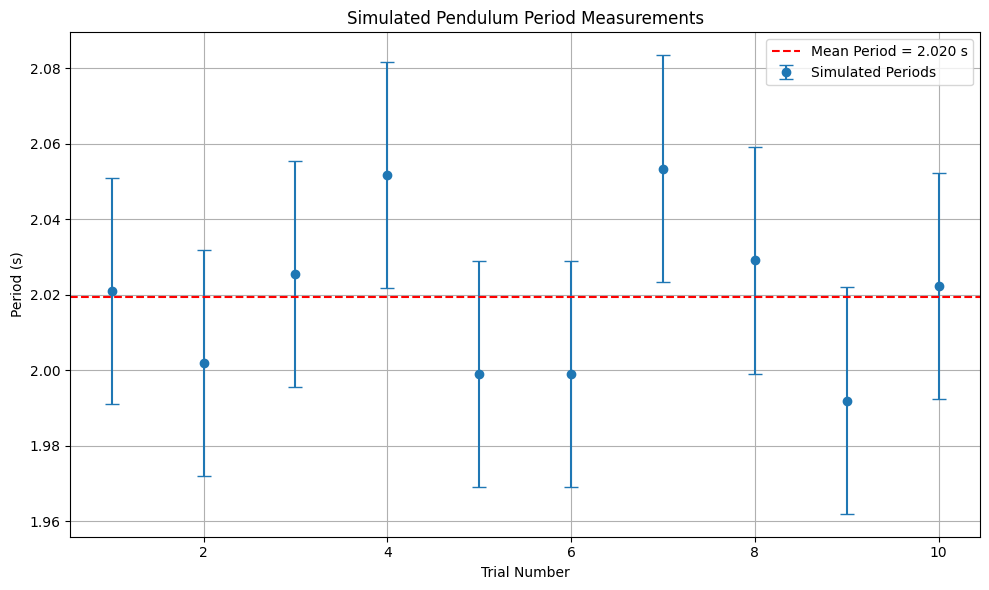

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# True value of gravitational acceleration
g_true = 9.81  # m/s^2

# Pendulum parameters
L = 1.00  # meters (length of the pendulum)
delta_L = 0.005  # uncertainty in length (meters)

# Calculate the theoretical period using the true g
T_true = 2 * np.pi * np.sqrt(L / g_true)

# Simulation parameters
n_trials = 10  # number of measurements
oscillations_per_trial = 10  # measure time for 10 swings
timer_noise_std = 0.3  # standard deviation of noise in seconds for 10 swings

# Simulate 10 measurements of 10 oscillations with added timing noise
times_10_oscillations = np.random.normal(
    loc=T_true * oscillations_per_trial,
    scale=timer_noise_std,
    size=n_trials
)

# Convert total times to individual periods
periods = times_10_oscillations / oscillations_per_trial

# Statistical calculations
T_mean = np.mean(periods)
T_std = np.std(periods, ddof=1)  # sample standard deviation
T_se = T_std / np.sqrt(n_trials)  # standard error of the mean
delta_T = T_se  # uncertainty in mean period

# Estimate g using the mean period
g_estimated = (4 * np.pi**2 * L) / (T_mean**2)

# Propagate uncertainty in g
delta_g = np.sqrt(
    ((4 * np.pi**2 / T_mean**2) * delta_L)**2 +
    ((8 * np.pi**2 * L / T_mean**3) * delta_T)**2
)

# Print results
print("Simulated Periods (s):", np.round(periods, 3))
print(f"Mean Period (s): {T_mean:.4f}")
print(f"Standard Deviation (s): {T_std:.4f}")
print(f"Estimated g (m/s^2): {g_estimated:.4f} ± {delta_g:.4f}")
print(f"Percentage Error: {100 * abs(g_estimated - g_true) / g_true:.2f}%")

# Plotting the measured periods
plt.figure(figsize=(10, 6))
plt.errorbar(
    range(1, n_trials + 1),
    periods,
    yerr=timer_noise_std / oscillations_per_trial,
    fmt='o',
    capsize=5,
    label='Simulated Periods'
)
plt.axhline(T_mean, color='red', linestyle='--', label=f'Mean Period = {T_mean:.3f} s')
plt.xlabel('Trial Number')
plt.ylabel('Period (s)')
plt.title('Simulated Pendulum Period Measurements')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
